# Plotting in python, welcome matplotlib

Let's recall the fibonacci function from yesterday

In [5]:
def fibonacci(sequence_length):
    "Return the Fibonacci sequence of length `sequence_length`"
    fibo_sequence = [1,1]
    if sequence_length < 0:
        print("Fibonacci sequence only defined for non-negative length")
        return
    if 0 <= sequence_length < 3:
        return fibo_sequence[:sequence_length]
    for i in range(2,sequence_length): 
        fibo_sequence.append(fibo_sequence[i-1]+fibo_sequence[i-2])
    return fibo_sequence

There are multiple ways of generating plots in python, but the most used is by means of a library called `matplotlib`. This in addition integrates nicely with the ipython notebooks by adding the _magic code_: `%matplotlib inline`.

In addition I like to load a style different from the default (see the next cell). Alternatively one can get a very beautiful style set-up just by `import seaborn` or `import prettyplotlib`.

We are skimming just the very surface of matplotlib, use some of the exercise time to try the example in the new [matplotlib tutorial](http://www.labri.fr/perso/nrougier/teaching/matplotlib/) (recommended), this [scientific python lecture](http://nbviewer.ipython.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb) or the [official one](http://matplotlib.org/users/pyplot_tutorial.html) and explore its capabilities.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('ggplot')

Let's plot fibonacci compared with factorial...

_In what follows, I use the suffix "-s" to stress that some things are vectors and not numbers._

In [6]:
from math import factorial

In [7]:
fibs  = fibonacci(10)
facts = [factorial(i) for i in range(10)]

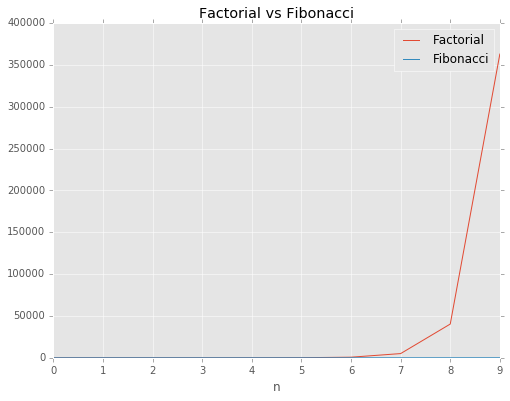

In [8]:
# create a new figure of size 8x6 points
# try to change those numbers and observe what happens to the aspect ratio and size
plt.figure(figsize=(8,6))

# plot the points in the array of factorial and fibonacci numbers and give them a label
plt.plot(facts, label="Factorial")
plt.plot(fibs,  label="Fibonacci")

# give a title to the plot
plt.title("Factorial vs Fibonacci")

# label the x axis
plt.xlabel("n")

# show the legend
plt.legend()

# show the plot
plt.show()

Plotting using a logaritmic scale on the y-axis can be done just changing the plot function

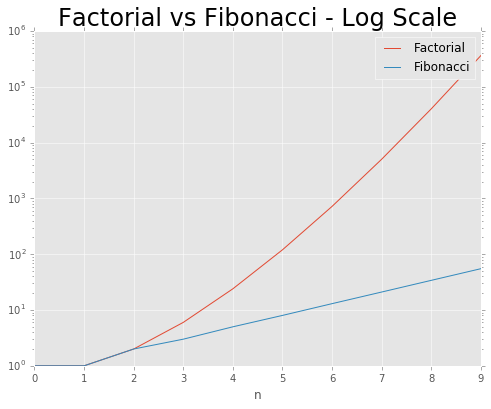

In [9]:
plt.figure(figsize=(8,6))

# plot the points in the array of factorial and fibonacci numbers 
# using log-scale on the y-axis (means that we are plotting y=log(f(n)) instead of the f)
plt.semilogy(facts, label="Factorial")
plt.semilogy(fibs,  label="Fibonacci")

plt.title("Factorial vs Fibonacci - Log Scale", fontsize=24)
plt.xlabel("n")
plt.legend()
plt.show()

To plot continuous functions it is useful to introduce another important library for numerical simulations: `numpy`. This provides very efficient functions to deal with multidimensional arrays and matrices (among other things)

In [10]:
import numpy as np

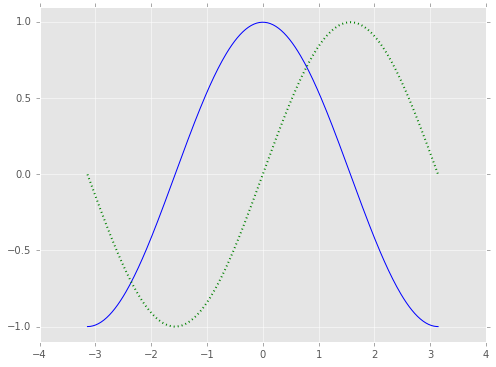

In [11]:
plt.figure(figsize=(8,6))

# we create an array of 256 points going from -pi to pi
xs = np.linspace(-np.pi, np.pi, 256, endpoint=True)

# Plot cosine using blue color with a continuous line of width 1 (pixels)
plt.plot(xs, np.cos(xs), color="blue", linewidth=1.0, linestyle="-")

# Plot sine using green color with a dotted line of width 2 (pixels)
# try the following linestyles: '', ' ', 'None', '--', '-.', '-', ':'
plt.plot(xs, np.sin(xs), color="green", linewidth=2.0, linestyle=":")

# Set x-axis plot limits
plt.xlim(-4.0, 4.0)

# Set position of ticks on the x-axis
plt.xticks(
    np.linspace(-4, 4, 9, endpoint=True)
)

# Set y limits
plt.ylim(-1.1, 1.1)

# Set y ticks
plt.yticks(
    np.linspace(-1, 1, 5, endpoint=True)
)

# Save figure using 72 dots per inch - not needed now
# savefig("example-1.png", dpi=72)

plt.show()

In fact, most of the plotting related functions in MATLAB are covered by the pylab module. For example, subplot and color/symbol selection

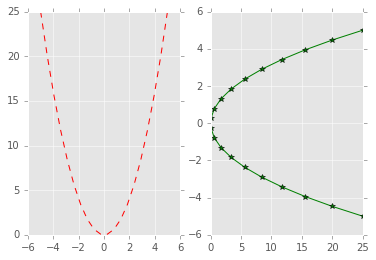

In [12]:
xs = np.linspace(-5,5,20)
ys = xs**2

# subplots: 1 row, 2 columns, 1st plot
plt.subplot(1,2,1)
plt.plot(xs, ys, 'r--')

# subplots: 1 row, 2 columns, 2nd plot
plt.subplot(1,2,2)
plt.plot(ys, xs, 'g*-')

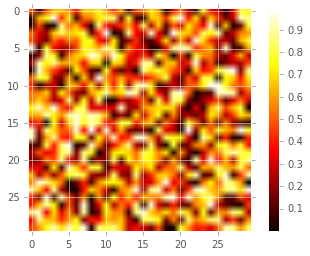

In [13]:
image = np.random.rand(30, 30)
plt.imshow(image, cmap=plt.cm.hot)    
plt.colorbar()
plt.show()

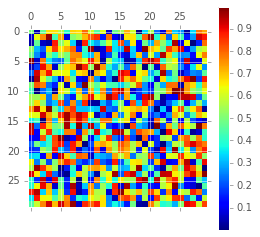

In [14]:
plt.matshow(image)
plt.colorbar()
plt.show()

Note that you could get rid of the prefixes `np.` and `plt.` simply with `from numpy import *` nd `from matplotlib.pyplot import *` but this is highly **not recommended**!

In [ ]:
plt.figure(figsize=(8,6))
for i in range(8):
    x = np.arange(1000)
    y = np.random.randn(1000).cumsum() # cumulative sums, thanks numpy!
    plt.plot(x, y, label=str(i))
    plt.legend()

## Plotting something more complex

Let's have a look at a more complex example, this will allow us to point out differet features of matplotlib and numpy. 

We are going to compute trajectories of the **logistic map $f_r$** for different values of the parameter $r$, where 
$$
f_r(x) = rx(1-x)
$$


In [16]:
def logistic(r, x):
    return r*x*(1-x)

The trajectory is simply the set of points $x_{n+1} = f_r(x_n)$, obtained iterating the function for a fixed value of $r$. We are going to simulate trajectories for $2000$ different values of $r$, equispaced between $0$ and $4$.

In [17]:
rpoints = 2000
rs = np.linspace(0.0, 4.0, rpoints)

We will compute the trajectories for the first $1000$ iterations but plot the last $200$ elements (we consider the first 800 iterations a sort of warm-up, to give a chance to the system to reach a stability point). All the trajectories will start from $x_0 = 0.1$.

In [18]:
x_iterations = 1000
x_to_plot = 200

In [19]:
# np.ones(l) is the vector (1.0, 1.0, ..., 1.0) of length l
# numpy makes sure that we can multiply scalars and vectors
xs = 0.00001 * np.ones(rpoints)

Given that we are here, we will compute (an approximation) of the **Lyapunov exponent** for the various values of $r$. This is defined as
$$
\lambda(r) = \lim_{n\to\infty} \frac{1}{n} 
    \sum_{i=1}^{n-1} \log\left| 
        \frac{d f_r}{dx}(x_i)
    \right|
$$

In [20]:
# we initialise lyapunov with zeroes (np.zeroes is like np.ones but the vector is the null one)
lyapunov_exps = np.zeros(rpoints)

In [ ]:
plt.figure(figsize=(14, 12))

plt.subplot(2,1,1) # you could also write 211: 2 rows, 1 column, 1st plot

# the limits here are not really necessary, try to comment them out and see how the plot changes
plt.xlim(0.0, 4.0)
plt.ylim(0.0, 1.0)

# yes, you can actually use latex in matplotlib labels!
plt.title("Bifurcation diagram for $f_r$")

# we could make a function to compute the iterations for each r, reiterating each time
# however, numpy allows us to work on the full vector in a very fast way all at once
for i in range(x_iterations):
    
    # although we did nothing to make logistic work on vectors,
    # thanks to numpy it does and properly returns a vector!
    xs = logistic(rs, xs)
    
    # meanwhile we compute the lyapunov exponent, we need to remember to scale it
    lyapunov_exps += np.log(abs(rs*(1-2*xs)))
    
    # if we have computed points on the tail that we want to plot,
    # let's plot them!
    if i >= (x_iterations - x_to_plot):
        plt.plot(rs, xs, color="black", marker=",", linestyle='', alpha=0.05)

# don't forget to divide the lyapunov expoby n
# we are doing it here to do it only once: it reduces the error and speeds up the code 
lyapunov_exps = lyapunov_exps/x_iterations

# we still have to plot the Lyapunov exponent
plt.subplot(2,1,2)
plt.xlim(0.0, 4.0)
plt.ylim(-2.0, 1.0)

plt.title("Lyapunov exponent $\lambda$")

# this dictionary contains the properties in common for the plot below
common_properties = {"marker":",", "linestyle":"", "alpha":0.5}

# we plot the points where the exponent is negative, notice how we are filtering them
# and notice how we are telling python to use the items in the `common_properties` dictionary
plt.plot(rs[lyapunov_exps<0], lyapunov_exps[lyapunov_exps<0], color="black",
         **common_properties)

# and we plot the points where the exponent is non negative in red
plt.plot(rs[lyapunov_exps>=0], lyapunov_exps[lyapunov_exps>=0], color="red", 
         **common_properties)

plt.show()

For all the properties of the plot function look at `?plt.plot` or the official documentation!

What can we infer about the relation between lyapunov exponents and behaviour from this picture?

**Exercise 1**: modify the code to plot trajectories starting from a different initial point or from a random initial point.

**Exercise 2**: modify the code to restrict the plot to $r\in\{2.5,4.0\}$ and compute only the required trajectories.

We have done already a lot relaed to plotting and vectorial functions, in the next lecture we are going to work on solving differential equations and working with arrays and matrices. Don't forget that we only gave a very brief and superficial look at the plotting capabilites of matplotlib, you can work with maps, make scatter plot, density plot, contour plot, three dimensional plot and even animations!

**Exercise 3**: plot the [Mandelbrot set](https://en.wikipedia.org/wiki/Mandelbrot_set)

**Exercise 4**: try to solve all the exercises in the [new matplotlib tutorial](http://www.labri.fr/perso/nrougier/teaching/matplotlib/#regular-plots)